# Conservation Analysis and Epitope Prediction


#### Author: C. Mazzaferro, K. Fisch
#### Email: cmazzafe@ucsd.edu
#### Date: August 2016
 
## Outline of Notebook
<a id = "toc"></a>
1. <a href = "#background">Background</a>
2. <a href = "#ConsA">Conservation Analysis</a>
    * <a href = "#BLAST">BLAST-P</a>
    * <a href = "#MSA">Multiple Sequence Alignment</a>
    * <a href = "#Cons">Conservation Score Prediction</a>
3. <a href = "#ep_pred">Windowing and New Epitope Prediction</a>
    * <a href = "#clustering">Epitope Clustering Analysis</a>

<a id = "background"></a>
# Background

CRISPR (clustered regularly interspaced short palindromic repeat) is an adaptive immune system that provides protection against mobile genetic elements (viruses, transposable elements and conjugative plasmids).
CRISPR clusters contain spacers, sequences complementary to antecedent mobile elements, and target invading nucleic acids. CRISPR clusters are transcribed and processed into CRISPR RNA (crRNA). In type II CRISPR systems correct processing of pre-crRNA requires a trans-encoded small RNA (tracrRNA), endogenous ribonuclease 3 (rnc) and this protein. The tracrRNA serves as a guide for ribonuclease 3-aided processing of pre-crRNA; Cas9 only stabilizes the pre-crRNA:tracrRNA interaction and has no catalytic function in RNA processing. Subsequently Cas9/crRNA/tracrRNA endonucleolytically cleaves linear or circular dsDNA target complementary to the spacer; Cas9 is inactive in the absence of the 2 guide RNAs (gRNA). The target strand not complementary to crRNA is first cut endonucleolytically, then trimmed 3'-5' exonucleolytically. DNA-binding requires protein and both gRNAs, as does nuclease activity. Cas9 recognizes the protospacer adjacent motif (PAM) in the CRISPR repeat sequences to help distinguish self versus nonself, as targets within the bacterial CRISPR locus do not have PAMs. DNA strand separation and heteroduplex formation starts at PAM sites; PAM recognition is required for catalytic activity (PubMed:24476820). Confers immunity against a plasmid with homology to the appropriate CRISPR spacer sequences (CRISPR interference) (PubMed:21455174)

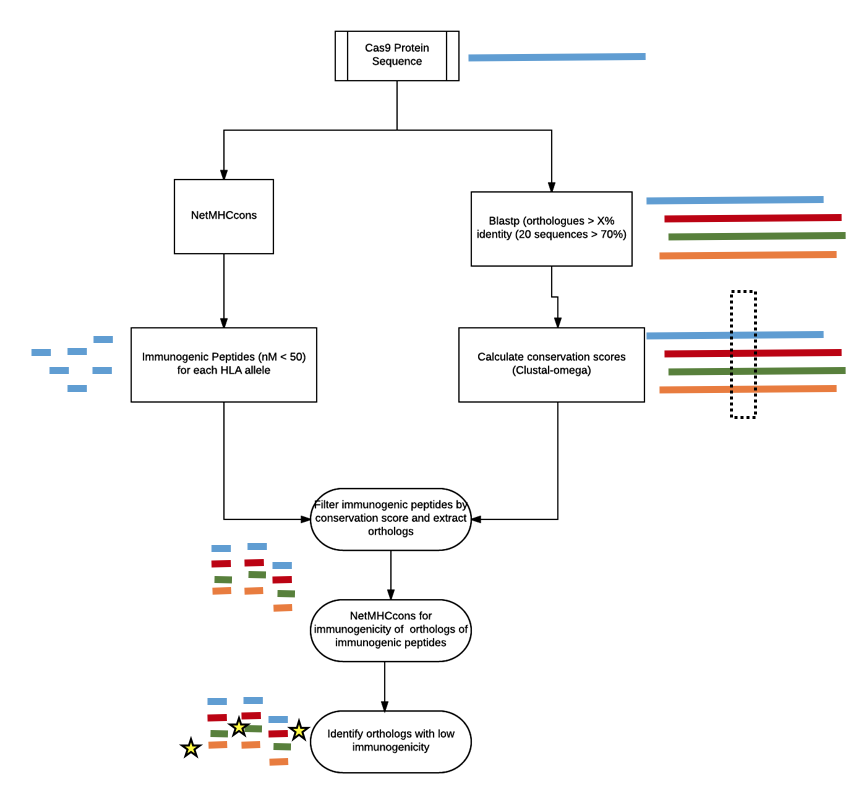

In [66]:
from IPython.display import Image
Image("/Users/carlomazzaferro/Desktop/BINF Int Rand Pics/workflow_epitope.png")

The pipeline presented here is aimed at identify the most immunogenic peptides in Cas9. By looking at multiple sequence alignment scores for the possible peptides and their associated predicted MHC affinity, we can determine which peptides within a Cas9 orthologue can be swapped in order to reduce overall immunogenecity.

The steps are constructed as follows: 

1. Run BLAST to find homolgue proteins
2. Peform Multiple Sequence Alignement (MSA) using locally installed [Clustal Omega](http://www.clustal.org/omega/) in order to determine conservation scores
3. Calculate conservation scores for each n-mer (sizes 9, 10, 11) of the MSA
4. Predict the MHC affinity of each peptide using [CBS's prediction services](http://www.cbs.dtu.dk/services/), in particular [netMHCcons Server](http://www.cbs.dtu.dk/services/NetMHCcons/)
5. Output list of highly low-conservation, high affinity peptides for in-vitro research

<a id = "ConsA"></a>
# Conservation Analysis

The package nepitope is used as a "glue" between the steps involved in epitope prediction analysis. It was designed specifically to enable the user to run the steps outlined in "Background" and rendering the inputs and outputs of each program compatible for each step. 


<a id = "BLAST"></a>
## BLAST 
Finding homologues that surpass a certain level of similarity by running BLAST on CAS9_STRP1 (UniProt ID: UniProtKB - Q99ZW2) against non-redundant databases. 
In order to retreieve the data regarding the protein, it is possible to send an HTTP request to the UniProt server by specifying the database and ID in this manner:
"http://www.uniprot.org/uniprot/Q99ZW2"

In [3]:
import sys
sys.path.append("/Users/carlomazzaferro/Documents/CCBB/antigen_discovery")

In [4]:
from nepitope import alignment_tool
from nepitope import scoring_utils
filepath = '/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/test.fasta'
ID = 'Q99ZW2'
website = 'uniprot'

#Wrapper to retrieve target protein in fasta format 
alignment_tool.fetch_protein(filepath, website=website, ID=ID, fetch_fasta=True)

/Users/carlomazzaferro/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1041: UserWarning: Duplicate key in file "/Users/carlomazzaferro/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


'File written to /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/test.fasta'

#### Run Command Line Blast 
Blast will be performed using theur RESTful API. This shouldn't be an issues since we are dealing with a single protein. 
For a thorough description of the parameters used in the BLAST analysis, refer to Biopythons [Command Line BLAST-P](http://biopython.org/DIST/docs/api/Bio.Blast.Applications.NcbiblastpCommandline-class.html) 

The output will be written as an xml file for ease of visualization and parsing. Biopython offers a variety of solutions for parsing xml data from Blast analyses.

In [39]:
#TODO: write wrapper
blastp -out /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/BLAST_out.xml -outfmt 5 -query /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/test.txt -db nr -remote -evalue 0.001

#### Visualize BLAST results

xml_filepath = '/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/BLAST_out.xml'
alignment_tool.viz_blast(xml_filepath)     

In [ ]:
#Write output for protein sequences picking ones with identity > treshold values

In [32]:
treshold = 70
fasta_out = '/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/fasta_out_from_blast.fasta'
alignment_tool.write_blast_filtered_output(xml_filepath, fasta_out, treshold)

## MSA (Clustal Omega)

In [35]:
#TODO: write wrapper functions 
#Run clustal omega
!clustalo -i /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/fasta_out_from_blast.fasta --residuenumber -o /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/msa_aligned.fasta --outfmt=fasta
#viz tool:
!mview -in clustal -ruler on -html head -coloring any /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/msa_aligned.clustal > /Users/carlomazzaferro/Documents/Code/clustal.html

In [51]:
#output written to msa_aligned.fasta

### Click [here](clustal.html) to see the alignment results!
(Or run next cell)

In [2]:
import os
import webbrowser
from urllib import pathname2url         

url = 'file:{}'.format(pathname2url(os.path.abspath("/Users/carlomazzaferro/clustal.html")))
webbrowser.open(url)

True

## Conservation Score Calculation
The Score class will take as input the n-mers of interest and will calculate conservation scores for each nmer as sliding window. Hence, each possible peptide's conservation score will be evaluated.

The method here reported is a reprodcution of the following [paper](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC4278717/#s4) (see Materials and Methods, section: "Conservation and binding scores test for vaccine candidate classification"): 

**Goodswen SJ, Kennedy PJ, Ellis JT**. Enhancing In Silico Protein-Based Vaccine Discovery for Eukaryotic Pathogens Using Predicted Peptide-MHC Binding and Peptide Conservation Scores. Kestler HA, ed. PLoS ONE. 2014;9(12):e115745. doi:10.1371/journal.pone.0115745.

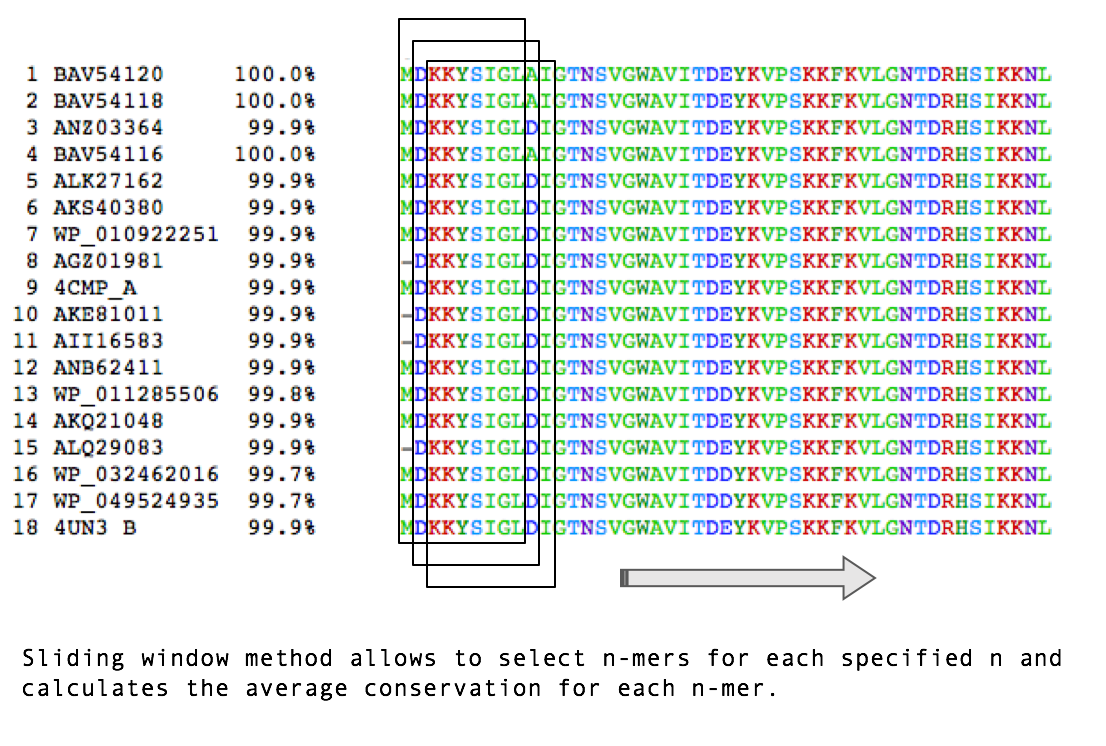

In [70]:
Image("/Users/carlomazzaferro/Desktop/BINF Int Rand Pics/windowing.png")

In [1]:
import sys
sys.path.append("/Users/carlomazzaferro/Documents/CCBB/antigen_discovery")
from nepitope import alignment_tool
from nepitope import scoring_utils
msa_alig = '/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/msa_aligned.fasta'
out_file_dir = '/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/'

#Create class instance
cls = scoring_utils.Score(msa_alig, [9,10,11])
score_list = cls.run_scoring(out_file_dir)
score_list

/Users/carlomazzaferro/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1041: UserWarning: Duplicate key in file "/Users/carlomazzaferro/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/processed_nmerized_9_0.txt
/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/processed_nmerized_9_1.txt
/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/processed_nmerized_9_10.txt
/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/processed_nmerized_9_100.txt
/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/processed_nmerized_9_101.txt
/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/processed_nmerized_9_102.txt
/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/processed_nmerized_9_103.txt
/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/processed_nmerized_9_104.txt
/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/processed_nmerized_9_105.txt
/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/processed_nmerized_9_106.txt
/Users/carlomazzaferro/Desktop/BINF

IndexError: list index out of range

### Create 'window' files for each possible nmer/peptide combination

#### Windowing

*Input*: clustal omega MSA file in FASTA format

*Output*: a file for each combination of window and window size

The output files will then be processed with an appropriate scoring module

In [7]:
out_file_dir = '/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/'
cls.make_windows(out_file_dir)

#### Scoring

Scoring methodology implemented is based on [Jensen–Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence). For an in-depth discussion of the methodology and background, see the [original paper](http://bioinformatics.oxfordjournals.org/content/23/15/1875.short) in which the method was first discussed for MSA scoring purposes.

*Input*: directory of window files

*Output*: dataframe containing list of every possible peptide and its associated conservation score

In [6]:
out_file_dir = '/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/'
score_list = cls.run_scoring(out_file_dir)

IndexError: list index out of range

In [14]:
score_list = cls.run_scoring(out_file_dir)
score_list

python /Users/carlomazzaferro/Documents/Code/score_conservation.py /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/nmerized_9_0
python /Users/carlomazzaferro/Documents/Code/score_conservation.py /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/nmerized_9_1
python /Users/carlomazzaferro/Documents/Code/score_conservation.py /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/nmerized_9_10
python /Users/carlomazzaferro/Documents/Code/score_conservation.py /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/nmerized_9_100
python /Users/carlomazzaferro/Documents/Code/score_conservation.py /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/nmerized_9_101
python /Users/carlomazzaferro/Documents/Code/score_conservation.py /Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/nmers_out/nmerized_9_102
python /Users/carlomazzaferro/Documents/Code/score_conservation.py /Users/carlomazzaferro/Desktop/BINF_ra

IndexError: list index out of range

In [12]:
import pandas
pandas.DataFrame(score_list, columns=['Score', 'Peptide', 'n-mer'])

NameError: name 'score_list' is not defined

In [ ]:
### Implement netMHCcons prediction tool on every peptide